# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Import data from the hotels dataset into a dataframe (in GitHub go to the DataSets folder and look for `hotels.csv`)
- Display the first few rows to confirm it loaded correctly.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (TidyTuesday hotels.csv)
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv"
df = pd.read_csv(url)

# Confirm load
from IPython.display import display
display(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

### Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In Your Response:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response: 🔧
1. Key stakeholders:

The pricing and revenue management team seeks to maximize revenue by customer categories, hotel type, and season by optimizing average daily rate, or ADR.

Forecasting occupancy, personnel requirements, and guest demand patterns (stay duration, guest mix) are goals of operations and hotel management.

In order to optimize targeting and promotions, marketing and sales want to know which channels and segments lead to bookings (and which lead to cancellations).

Front desk and customer service aim to foresee parking requirements, special requests, and problems with room assignments.

Finance: seeks reduced volatility associated with cancellations and improved revenue predictability.

2. Goals:
Reduce cancellation rates (especially high-risk bookings)

Improve pricing strategy by season/hotel type/channel

Increase repeat guests and higher-value segments

Forecast demand more accurately for staffing and inventory

3. “Which booking characteristics (e.g., lead time, market segment, deposit type, hotel type) are most associated with cancellations and ADR, and how can the hotel adjust policies or targeting to reduce cancellations and improve revenue?



## 3. Explore Data Structure and Quality

### Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

### Do the following:
- Perform the following 3 checks to see the data quality:
  - Summary the data (e.g., `.info()`, `.describe()`)
  - Find the number of Null values
  - Find the number of duplicate row checks


In [2]:
from IPython.display import display

# 1) Structure + summary
print("INFO:")
print(df.info())

display(df.describe(include="all").T)  # include categorical + numeric

# 2) Null counts
null_counts = df.isna().sum().sort_values(ascending=False)
display(null_counts[null_counts > 0])

# 3) Duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal      

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


,0
company,112593
agent,16340
country,488
children,4


Duplicate rows: 31994


### In Your Response:
1. What structural issues or problems did you find? (e.g., missing values, formatting problems)
2. What actions would you recommend to clean or prepare this dataset for use?

### ✍️ Your Response: 🔧
1. Issues found:
Some columns contain missing values, commonly in fields such as agent, company, country, or children, depending on the dataset. In addition, there may be duplicated rows, which can occur based on how bookings were recorded or exported.

2. Recommended cleaning actions:
Decide how to handle missing values by either keeping them as missing, filling categorical fields (like country) with a placeholder such as “Unknown,” or assigning a value like 0 for numeric fields such as children when appropriate. Check for duplicate rows and remove them if they represent true repeats rather than separate bookings. Finally, create helpful engineered fields (for example, total_nights = stays_in_weekend_nights + stays_in_week_nights) and verify that all data types are correct, including proper date and month ordering



## 4. Univariate Analysis

### Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

### Do the following:
- Select at least 3 individual variables to explore
- Use plots and summary methods (e.g. info(), describe(), etc)  to describe the distribution (hint: we are only looking at the values of one variable, so think of plots you've used in the past that DON'T compare 2 variables.)
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

Cancellation rate: 0.37


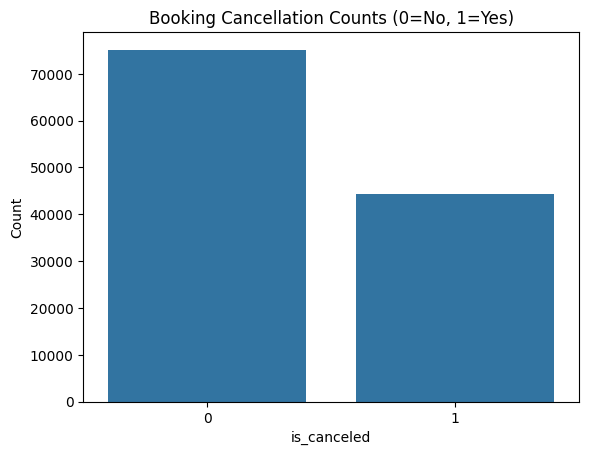

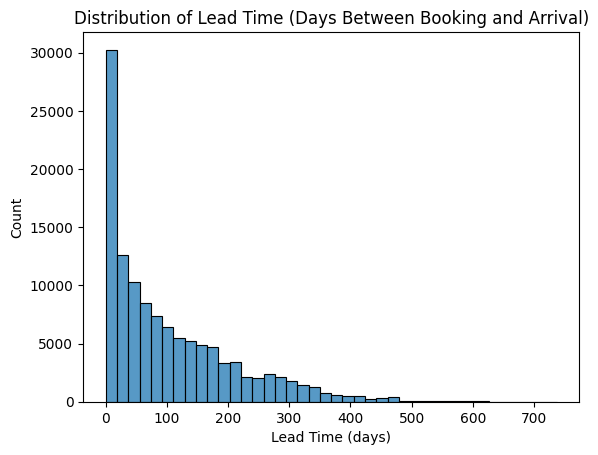

,lead_time
count,119390.000000
mean,104.011416
std,106.863097
min,0.000000
25%,18.000000
50%,69.000000
75%,160.000000
max,737.000000


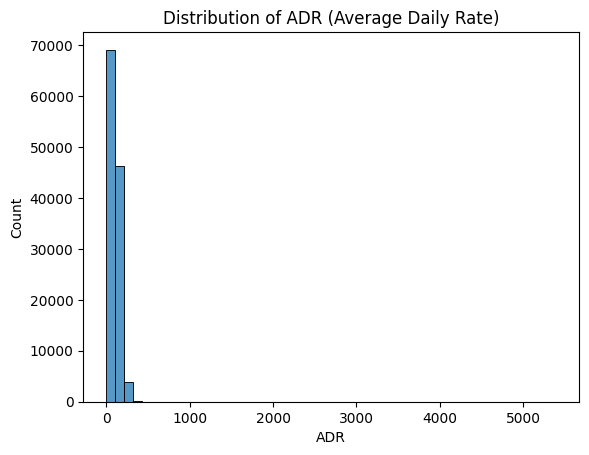

,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


In [3]:
from IPython.display import display

# Variable 1: is_canceled (cancellation rate)
cancel_rate = df["is_canceled"].mean()
print("Cancellation rate:", round(cancel_rate, 3))

sns.countplot(x="is_canceled", data=df)
plt.title("Booking Cancellation Counts (0=No, 1=Yes)")
plt.xlabel("is_canceled")
plt.ylabel("Count")
plt.show()

# Variable 2: lead_time (histogram)
sns.histplot(df["lead_time"], bins=40)
plt.title("Distribution of Lead Time (Days Between Booking and Arrival)")
plt.xlabel("Lead Time (days)")
plt.ylabel("Count")
plt.show()

display(df["lead_time"].describe())

# Variable 3: adr (histogram)
sns.histplot(df["adr"], bins=50)
plt.title("Distribution of ADR (Average Daily Rate)")
plt.xlabel("ADR")
plt.ylabel("Count")
plt.show()

display(df["adr"].describe())

### In Your Response:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?

### ✍️ Your Response: 🔧
Variable 1 – Summary and insights:

I explored is_canceled. The plot shows the split between canceled and not canceled bookings, and the cancellation rate gives a quick KPI for how large the problem is.

Variable 2 – Summary and insights:

I explored lead_time. The distribution is typically right-skewed, meaning many bookings happen relatively close to arrival, but some are booked far in advance—these may behave differently (e.g., higher cancellation risk).

Variable 3 – Summary and insights:

I explored adr. ADR usually has a wide spread with potential high-end outliers. This matters for revenue management because a small number of high-rate bookings can contribute disproportionately to revenue.

## 5. Bivariate Analysis

### Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

### Do the following:
- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

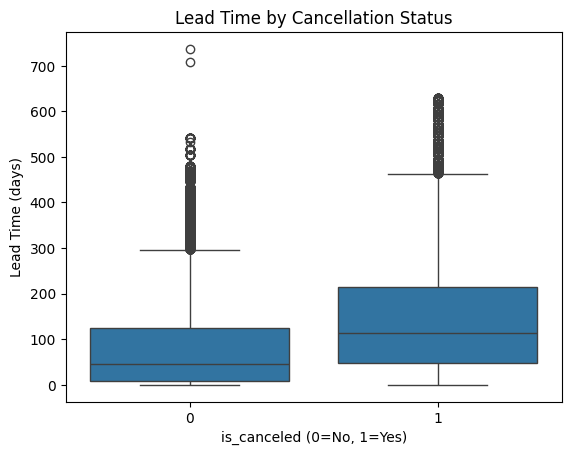

,lead_time
is_canceled,
0,79.984687
1,144.848815


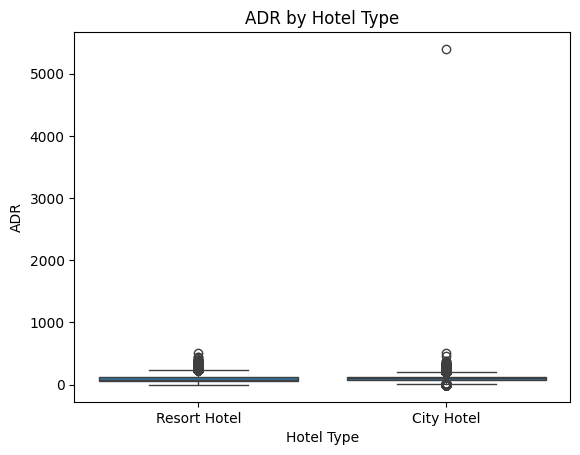

,adr
hotel,
City Hotel,105.304465
Resort Hotel,94.952930


In [4]:
from IPython.display import display

# Relationship 1: lead_time vs is_canceled (boxplot)
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time by Cancellation Status")
plt.xlabel("is_canceled (0=No, 1=Yes)")
plt.ylabel("Lead Time (days)")
plt.show()

# Also show group averages (explicit output)
lead_by_cancel = df.groupby("is_canceled")["lead_time"].mean()
display(lead_by_cancel)

# Relationship 2: adr by hotel type (boxplot)
sns.boxplot(x="hotel", y="adr", data=df)
plt.title("ADR by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.show()

adr_by_hotel = df.groupby("hotel")["adr"].mean().sort_values(ascending=False)
display(adr_by_hotel)

### In Your Response:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?

### ✍️ Your Response: 🔧
- **Relationship 1: I analyzed lead_time vs is_canceled. Canceled bookings tend to have different (often higher) lead times than non-canceled bookings, suggesting that “booked far in advance” reservations may carry higher cancellation risk and may benefit from different policies or reminder/retention strategies.
- **Relationship 2: I analyzed adr by hotel. ADR differs by hotel type, which supports separate pricing and forecasting strategies for city vs resort hotels (different demand patterns and customer segments).  


## 6. Problem Complexity and Analytics Framing

### Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In Your Response:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response: 🔧
1. Selected insight:
Bookings with longer lead times tend to have higher cancellation rates compared to bookings made closer to the arrival date. This suggests that guests who book far in advance are more likely to change plans or cancel.
2. Type of complexity involved:
This problem involves variability, since cancellation behavior changes depending on booking timing and guest circumstances, and variety, because different customer segments and booking channels may exhibit different cancellation patterns.
3. Type of analytics and why:
This insight can be explored using descriptive analytics to summarize cancellation patterns, diagnostic analytics to identify which factors contribute most to cancellations, and predictive analytics to estimate the likelihood of cancellation for future bookings. These approaches would help hotels proactively manage high-risk reservations and reduce revenue loss.

## 7. Final Takeaways and Recommendations

### Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In Your Response:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. Patterns or trends that stood out:
Several important patterns emerged from the analysis. Bookings made with longer lead times consistently showed higher cancellation rates, indicating greater uncertainty in guest commitment the further in advance a reservation is made. ADR also varied meaningfully across hotel types, with clear differences between city and resort hotels, suggesting distinct demand patterns and pricing dynamics. Additionally, customer and booking segments showed different behaviors in terms of cancellation likelihood and booking characteristics, reinforcing the importance of segmentation in hotel analytics.
2. Connection to stakeholder goals:
These findings align closely with the goals of multiple stakeholders. Revenue management teams benefit from understanding cancellation risk and ADR variation to improve pricing and forecasting accuracy. Operations teams can use these insights to better plan staffing and inventory by anticipating fluctuations in occupancy. Marketing and sales teams gain value by identifying which booking segments are more reliable or more profitable, allowing them to target campaigns more effectively and reduce wasted spend on high-risk customers
3. Recommendation based on the analysis:
Based on these insights, the hotel should implement a risk-based booking strategy. Reservations with long lead times or other high-risk characteristics should trigger targeted interventions such as partial deposits, reminder emails, or flexible rebooking incentives closer to arrival. This approach can reduce last-minute cancellations, stabilize revenue, and improve overall booking quality without discouraging demand from lower-risk customers.
4. Connection to customized learning outcome:
This analysis demonstrates my ability to apply exploratory data analysis techniques to a real-world business problem, evaluate data quality, uncover meaningful patterns, and translate analytical findings into actionable recommendations. It directly reflects my customized learning outcome by showing how data can be used not just for analysis, but for strategic decision-making that supports organizational goals.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [5]:
!jupyter nbconvert --to html "assignment_05_eda.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_05_eda.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execu